## Lab Introduction
This lab will introduce you to using [TensorFlow](https://www.tensorflow.org/) for building multi-layer perceptrons and convolutional neural networks. This is loosely based on the tutorials [here](https://www.tensorflow.org/guide/keras/training_with_built_in_methods). TensorFlow has [excellent documentation](https://www.tensorflow.org/api_docs/python/tf/keras). If you're running this in Colab, you can improve the speed of execution by selecting : Runtime | Change Runtime Type and selecting GPU (graphics processing unit) or [TPU](https://en.wikipedia.org/wiki/Tensor_Processing_Unit)

## Imports
We need to import tensorflow, commonly named as tf.
We also use tf.keras and tf.keras.layers a lot as well, so we rename those.


In [ ]:
import tensorflow as tf
keras = tf.keras
layers = tf.keras.layers
# Include numpy for basic stuff
import numpy as np
# matplotlib allows us to visualise our data.
import matplotlib.pyplot as plt
# Import a library for displaying models
from IPython.display import Image

## Let's get some data
For this lab we're going to look at the [MNIST handwritten digit dataset](http://yann.lecun.com/exdb/mnist/). This dataset has been explored for a wide variety of models and serves as a standard benchmark for comparing things. Today we're going to be looking at a digit classification task.
1. Look at the size and shape of the data elements. How large are the images? How are the labels stored?
2. Use [plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=imshow#matplotlib.pyplot.imshow) to visualise some examples from the data. Check what the corresponding label for each example is.

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) [0 1 2 3 4 5 6 7 8 9]


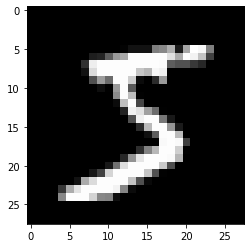

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Print the shapes of the array and the unique label
print(x_train.shape, y_train.shape, np.unique(y_test))

# Pick an example index
example_idx = 0
plt.imshow(x_train[example_idx,...],cmap='gray')
# Print the label
plt.show()


## Preparing the data for training
To get the data ready for training, it's best to squash the input pixel values to being in the range 0-1. Image data is normally stored using unsigned 8bit integers, so takes value between 0 and 255. We can simply convert to floats and divide by 255.

We also hold some data from the test set out for validation, and shuffle the training data (in case the data order could cause some bias).

Trace through the code below to understand what's going on.


In [ ]:
# Divide the image data to put it in the right range and convert to floating point numbers
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Convert the labels to floating point
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve the last 10,000 samples for validation. We can use these to optimise our hyper-parameters.
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Prepare the training dataset into batches and shuffle the examples
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset into batches
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

## Define an MLP model
Firstly, let's try and define a simple MLP model. In TensorFlow, we refer to fully-connected layers as [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In this section, we will use the simple [sequential model definition approach](https://www.tensorflow.org/guide/keras/sequential_model). This assumes we have a single input and output array, and we successively apply the model layers (building blocks).

Fill in the ? in the section below to create an MLP model and draw a picture of the model.

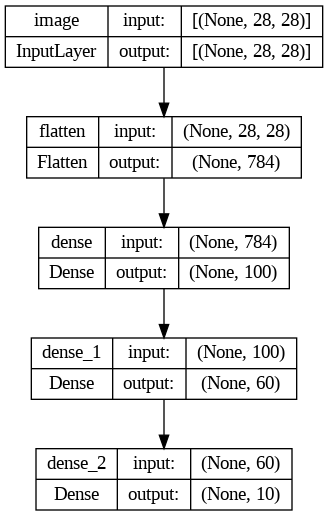

In [ ]:
def build_mlp_model():
  # Create an MLP model using the sequential model API
  # Note that the Input size relates to the size of each instance, so each image has size 28,28
  layers_list = [keras.Input(shape=(28,28), name="image"),
                 # First flatten out the spatial component, to make one long vector
                 layers.Flatten(),
                 # Next add a dense layer with a suitable activation function
                 layers.Dense(100, activation='relu'),
                 layers.Dense(60, activation='relu'),
                 # Finally, add another dense layer which has the same number of units as the number of classes
                 # This layer should use a softmax activation, which converts the numbers into class probabilities
                 layers.Dense(10, activation='softmax')]

  # Create a model based on the layer list
  model = keras.Sequential(layers_list)
  return model

# Create the model
mlp_model = build_mlp_model()
# Draw a picture of the MLP model details
keras.utils.plot_model(mlp_model, "mlp_model.png", show_shapes=True)
Image(retina=True, filename='mlp_model.png')


## Training the model
In order to train the model, we need to [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) it for training. This involves specifying the loss functions we will use, any "metrics" to calculate on the data and the optimizer to use it.

1. Read this [section of the tutorial](https://keras.io/api/losses) on building models to identify some suitable losses and metrics to compile the model. Investigate the optimizer choices, and the "learning_rate" hyper-parameter.
2. Call the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. To understand what happens in fit and how you can change it, see this [tutorial](https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit/). Remember an epoch, is the number of times we train the model with every item in the training dataset.

In [ ]:
mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
mlp_model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
782/782 [==============================] - 14s 15ms/step - loss: 0.3271 - sparse_categorical_accuracy: 0.9078 - val_loss: 0.1765 - val_sparse_categorical_accuracy: 0.9496
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9574 - val_loss: 0.1175 - val_sparse_categorical_accuracy: 0.9667
Epoch 3/20
782/782 [==============================] - 9s 12ms/step - loss: 0.0972 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.1019 - val_sparse_categorical_accuracy: 0.9700
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0749 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.0932 - val_sparse_categorical_accuracy: 0.9727
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0586 - sparse_categorical_accuracy: 0.9820 - val_loss: 0.0906 - val_sparse_categorical_accuracy: 0.9744
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.0473 - sparse_categor

## Define a convolutional neural network model
Let's follow the same procss, but build a convolutional neural network model. We'll also try out the [Functional API](https://www.tensorflow.org/guide/keras/functional). This offers more flexibility than the Sequential API, and makes it easier to use the existing components to make residual blocks.

The key layers to use are:
+ [layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
+ [layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

Build a suitable convolutional model (don't add too many filters, and stick with a kernel_size of 3 to keep it quick). Remember you'll still want a Dense layer with a softmax activation for the final classification.


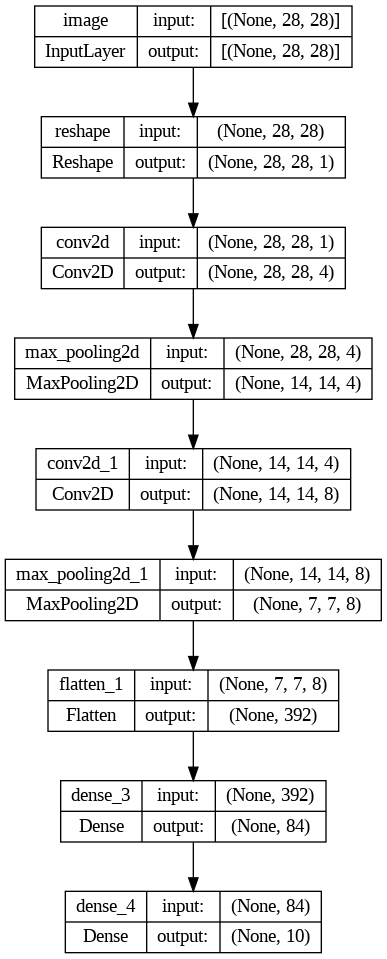

In [ ]:
def build_conv_model():
  # Return a convolutional model using the functional API
  # Note that the Input size relates to the size of each instance
  inputs = keras.Input(shape=(28,28), name="image")
  net = inputs
  # We need to reshape the data before convolution such that it's grayscale image with 1 channel
  # Note we create the object, and then call it
  net = layers.Reshape((28,28,1))(net)

  # We can also define the layer object, and store it in a Python variable and call it later
  # We're more likely to want to do this for layers that contain model weights
  conv1 = layers.Conv2D(filters=4, kernel_size=3, padding='same', activation='relu')
  net = conv1(net)
  net = layers.MaxPool2D()(net)

  conv2 = layers.Conv2D(filters=8, kernel_size=3, padding='same', activation='relu')
  net = conv2(net)
  net = layers.MaxPool2D()(net)

  dense1 = layers.Dense(units=84, activation='relu')
  # We need to flatten the spatial dimensions before putting it through the dense layers
  net = layers.Flatten()(net)
  net = dense1(net)
  dense2 = layers.Dense(units=10, activation='softmax')
  net = dense2(net)

  return keras.Model(inputs=inputs, outputs=net)

conv_model = build_conv_model()

# Draw the network diagram
keras.utils.plot_model(conv_model, "conv_model.png", show_shapes=True)
Image(retina=True, filename='conv_model.png')


## Train the model
Compile and fit the convolutional model, the same way you did with the MLP.
1. Experiment with the model architecture and learning rates. See what gives you the best performance on the validation metrics

In [ ]:
conv_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
conv_model.fit(train_dataset, batch_size=64, epochs=20, validation_data=val_dataset)

Epoch 1/20
782/782 [==============================] - 25s 30ms/step - loss: 0.4111 - sparse_categorical_accuracy: 0.8782 - val_loss: 0.1566 - val_sparse_categorical_accuracy: 0.9553
Epoch 2/20
782/782 [==============================] - 24s 31ms/step - loss: 0.1348 - sparse_categorical_accuracy: 0.9590 - val_loss: 0.1085 - val_sparse_categorical_accuracy: 0.9690
Epoch 3/20
782/782 [==============================] - 24s 31ms/step - loss: 0.0922 - sparse_categorical_accuracy: 0.9715 - val_loss: 0.0852 - val_sparse_categorical_accuracy: 0.9764
Epoch 4/20
782/782 [==============================] - 22s 29ms/step - loss: 0.0739 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0724 - val_sparse_categorical_accuracy: 0.9796
Epoch 5/20
782/782 [==============================] - 24s 31ms/step - loss: 0.0618 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.0646 - val_sparse_categorical_accuracy: 0.9812
Epoch 6/20
782/782 [==============================] - 24s 30ms/step - loss: 0.0517 - spars

## Evaluate the models
Once we've experimented with various models and tuned our architectures/hyper-parameters on the validation set, we can look at the test data.

1. Use the [model.evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) method to compare metrics between the models on the test set. See an example  in the section [API overview: a first end-to-end example](https://keras.io/guides/training_with_built_in_methods/). Which models works best on the test data?

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = conv_model.evaluate(x_test, y_test, batch_size=128)
print("Conv model test loss, test acc:", results)
results = mlp_model.evaluate(x_test, y_test, batch_size=128)
print("MLP model test loss, test acc:", results)


Evaluate on test data
79/79 [==============================] - 2s 21ms/step - loss: 0.0622 - sparse_categorical_accuracy: 0.9841
Conv model test loss, test acc: [0.06215307116508484, 0.9840999841690063]
79/79 [==============================] - 0s 3ms/step - loss: 0.1214 - sparse_categorical_accuracy: 0.9743
MLP model test loss, test acc: [0.12144602090120316, 0.9743000268936157]


## Switch to a tougher dataset
[FashionMNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist) is similar to MNIST, but contains grayscale images of fashion items. It's a bit tougher, but the images are the same size. Make sure you do the same preprocessing on this dataset.
1. Have a go at running your MLP and convolutional models on this dataset. Do they work similarly well on this dataset?
2. What changes can you make to get a classification on the validation set above 90%?


4422102/4422102 [==============================] - 0s 0us/step


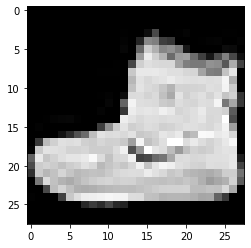

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

plt.imshow(x_train[0,...],cmap='gray')
plt.show()

# Divide the image data to put it in the right range and convert to floating point numbers
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Convert the labels to floating point
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve the last 10,000 samples for validation. We can use these to optimise our hyper-parameters.
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)


In [ ]:

# Remember to build a fresh model, the old weights won't be relevant
conv_model = build_conv_model()

# Fit the model parameters

conv_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
conv_model.fit(train_dataset, batch_size=64, epochs=20, validation_data=val_dataset)

results = conv_model.evaluate(x_test, y_test, batch_size=128)
print("Conv model test loss, test acc:", results)

Epoch 1/20
782/782 [==============================] - 27s 33ms/step - loss: 0.5765 - sparse_categorical_accuracy: 0.7967 - val_loss: 0.4383 - val_sparse_categorical_accuracy: 0.8418
Epoch 2/20
782/782 [==============================] - 26s 34ms/step - loss: 0.3934 - sparse_categorical_accuracy: 0.8602 - val_loss: 0.4248 - val_sparse_categorical_accuracy: 0.8455
Epoch 3/20
782/782 [==============================] - 25s 32ms/step - loss: 0.3515 - sparse_categorical_accuracy: 0.8731 - val_loss: 0.3482 - val_sparse_categorical_accuracy: 0.8735
Epoch 4/20
782/782 [==============================] - 27s 35ms/step - loss: 0.3286 - sparse_categorical_accuracy: 0.8808 - val_loss: 0.3342 - val_sparse_categorical_accuracy: 0.8787
Epoch 5/20
782/782 [==============================] - 24s 30ms/step - loss: 0.3099 - sparse_categorical_accuracy: 0.8873 - val_loss: 0.3277 - val_sparse_categorical_accuracy: 0.8806
Epoch 6/20
782/782 [==============================] - 25s 33ms/step - loss: 0.2967 - spars

## Extension Tasks
You don't need to do these extensions, but you'll certainly learn something by giving them a go.
1. Find some validation/test examples where your model performs poorly. Visualise those examples. Can you think of a reason why it doesn't work well for those ones? Is it ambiguous?
1. Look at a more complex (but still low-resolution) image dataset. [CIFAR 10](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10) or [CIFAR 100](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100).
3. Try including [BatchNorm](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) or [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
3. Implement a residual block, you could try sub-classing the [Layer base class](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
4. Learn how to use [Tensorboard](https://www.tensorflow.org/tensorboard), an excellent tool for visualising your model training, which you can either run from [Colab](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tensorboard_in_notebooks.ipynb) or install on your local machine
